# Breast Cancer Detection: Data Preparation & Exploratory Data Analysis

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


1. Business Understandig

2. Data Understandig

In [62]:
# Load the Wisconsin Diagnostic Breast Cancer dataset
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head(10))

Dataset shape: (569, 33)
Total samples: 569
Total features: 33

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean 

In [63]:
# Check for columns with all NaN values
print("\nColumns with all NaN values:")
nan_cols = df.columns[df.isna().all()].tolist()
print(nan_cols if nan_cols else "None")


Columns with all NaN values:
['Unnamed: 32']


In [64]:
# CHECK FOR MISSING VALUES

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df)
else:
    print("\n✓ No missing values found in the dataset")


Columns with missing values:
         Column  Missing_Count  Percentage
32  Unnamed: 32            569       100.0


In [65]:
# DATA INFORMATION

print("\nData types:")
print(df.dtypes.value_counts())

print("\nDetailed information:")
df.info()


Data types:
float64    31
int64       1
object      1
Name: count, dtype: int64

Detailed information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 n


Diagnosis Distribution:
Benign (B): 357 samples (62.74%)
Malignant (M): 212 samples (37.26%)

✓ Target variable encoded: M=1 (Malignant), B=0 (Benign)


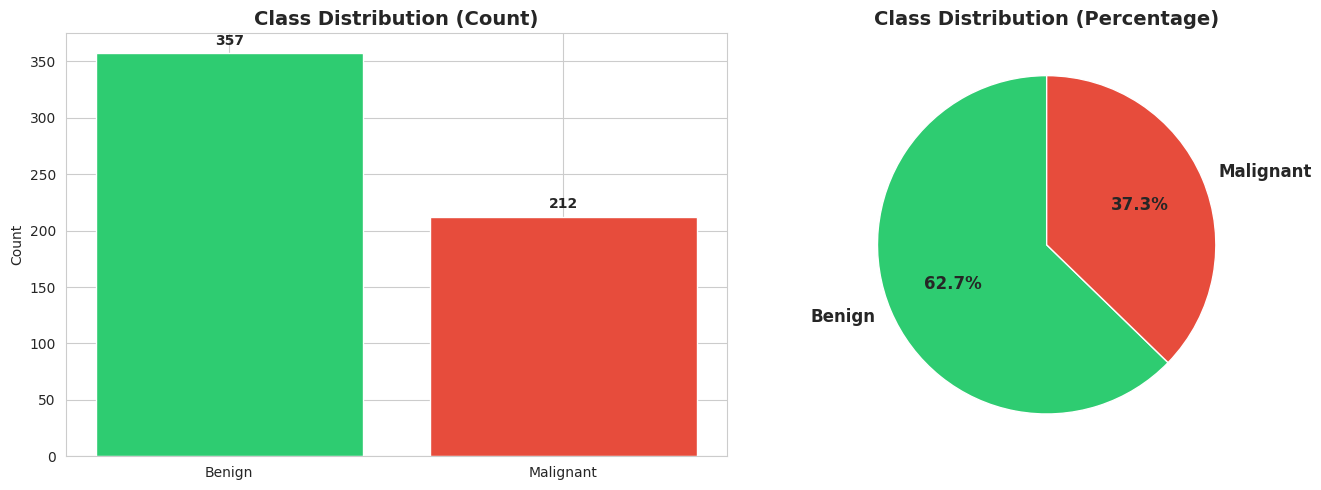

✓ Visualization saved as 'class_distribution.png'


In [66]:
# TARGET VARIABLE ANALYSIS

# Check diagnosis distribution
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_percentages = df['diagnosis'].value_counts(normalize=True) * 100

print("\nDiagnosis Distribution:")
print(f"Benign (B): {diagnosis_counts['B']} samples ({diagnosis_percentages['B']:.2f}%)")
print(f"Malignant (M): {diagnosis_counts['M']} samples ({diagnosis_percentages['M']:.2f}%)")

# Encode target variable: M (Malignant) = 1, B (Benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("\n✓ Target variable encoded: M=1 (Malignant), B=0 (Benign)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
diagnosis_labels = ['Benign', 'Malignant']
diagnosis_values = [diagnosis_counts['B'], diagnosis_counts['M']]
axes[0].bar(diagnosis_labels, diagnosis_values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
for i, v in enumerate(diagnosis_values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(diagnosis_values, labels=diagnosis_labels, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'class_distribution.png'")

In [67]:
# FEATURE CATEGORIZATION

# Categorize features as in the paper
mean_features = [col for col in df.columns if col.endswith('_mean')]
se_features = [col for col in df.columns if col.endswith('_se')]
worst_features = [col for col in df.columns if col.endswith('_worst')]

print(f"\nMean features (10): {len(mean_features)}")
print(mean_features)
print(f"\nStandard Error features (10): {len(se_features)}")
print(se_features)
print(f"\nWorst features (10): {len(worst_features)}")
print(worst_features)


Mean features (10): 10
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

Standard Error features (10): 10
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

Worst features (10): 10
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [68]:
# STATISTICAL SUMMARY

# Separate features by diagnosis
benign = df[df['diagnosis'] == 0]
malignant = df[df['diagnosis'] == 1]

print("\nOverall Statistics:")
print(df.describe())

print("Statistics for Benign Cases:")
print(benign.describe())

print("Statistics for Malignant Cases:")
print(malignant.describe())


Overall Statistics:
                 id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813    


EXPLORATORY DATA ANALYSIS

[1/7] Creating distribution plots for mean features...


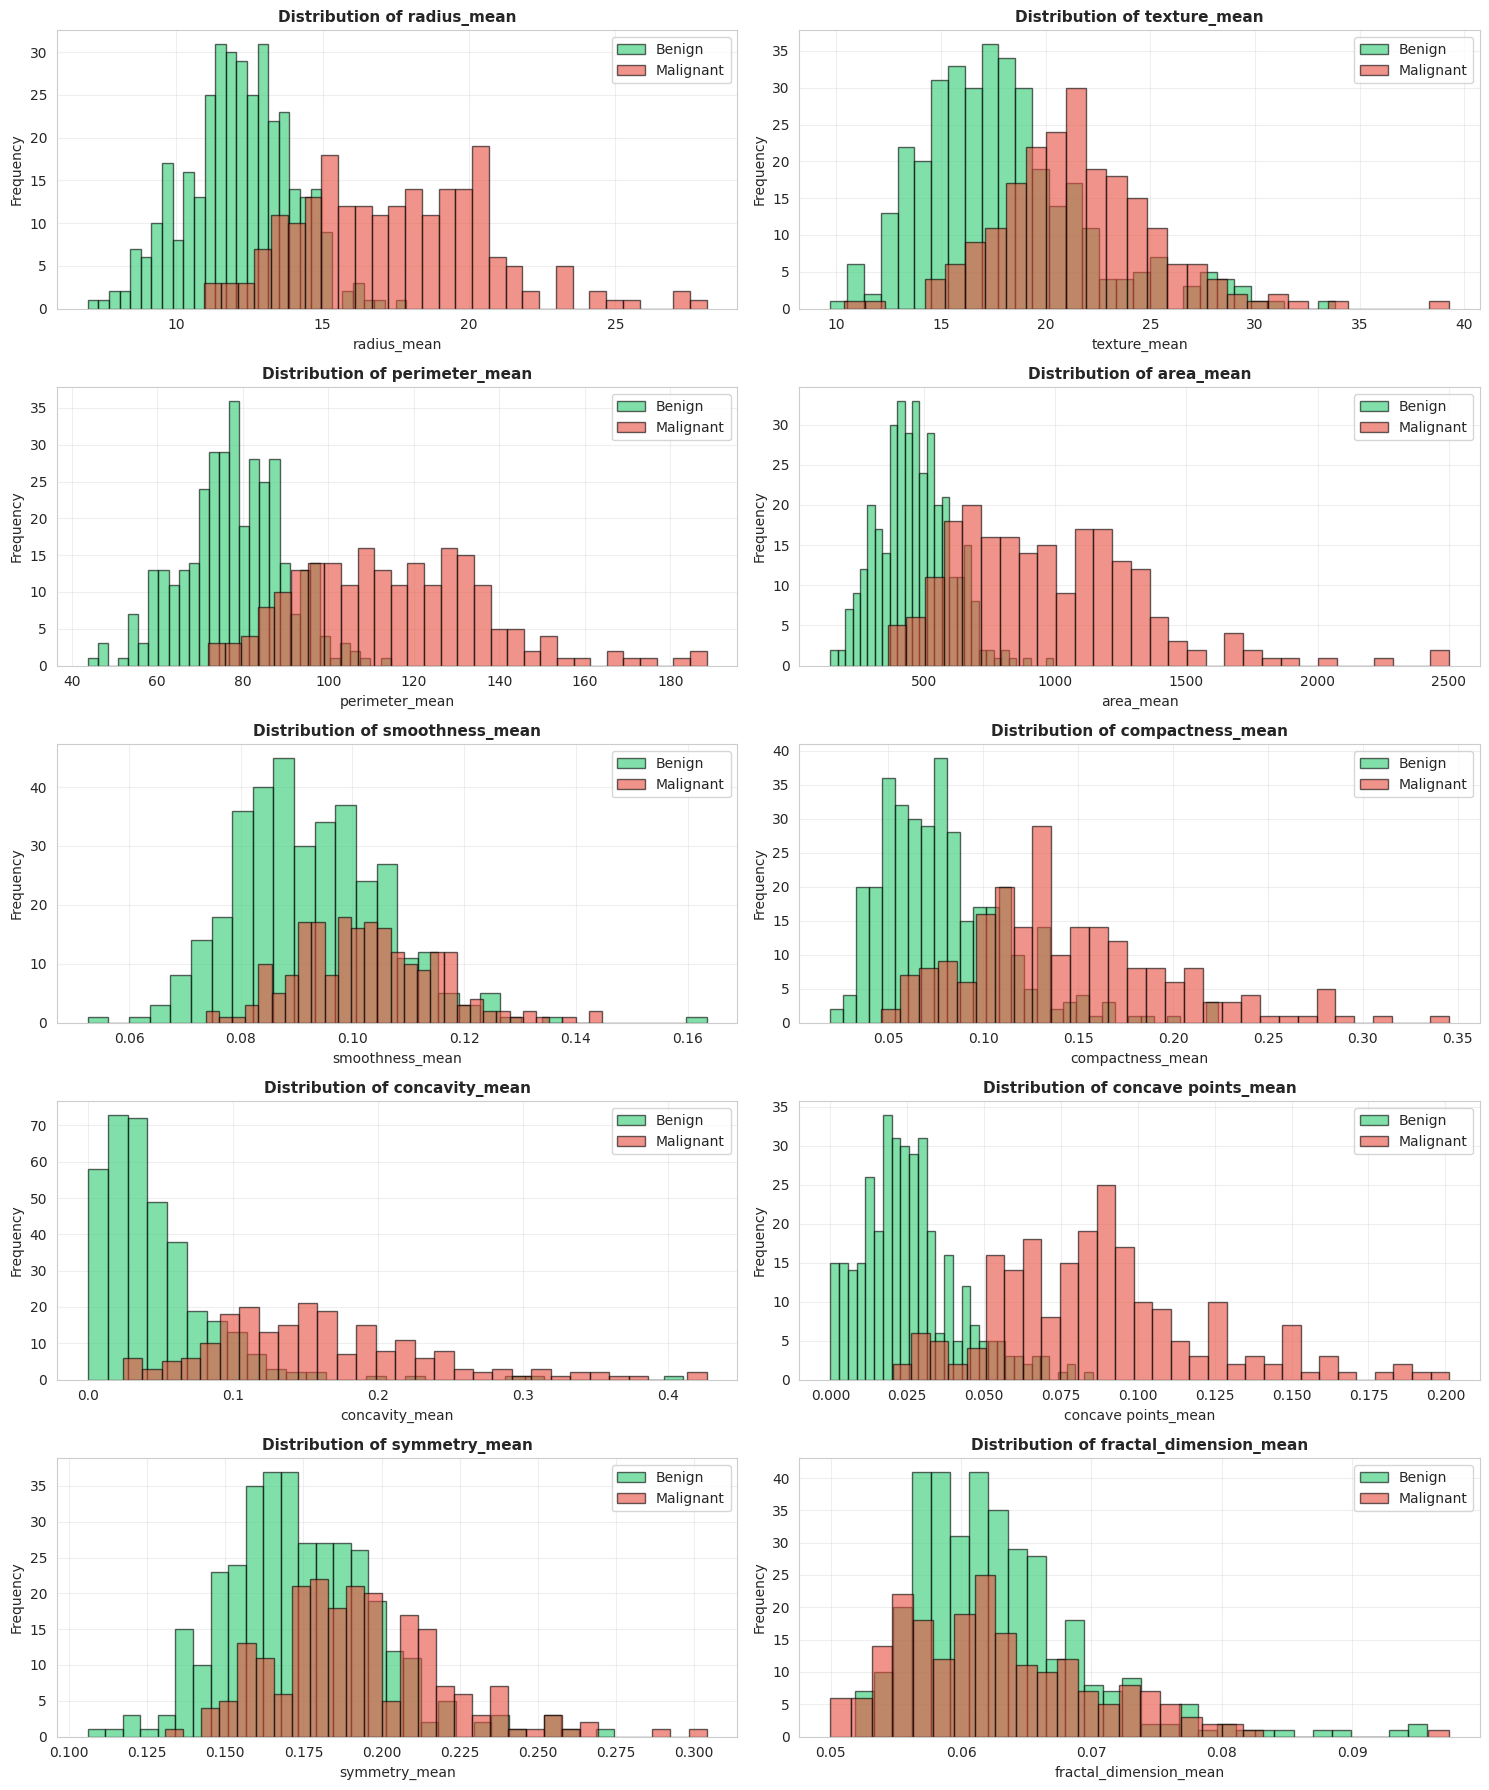

✓ Saved as 'mean_features_distribution.png'

[2/7] Creating box plots for mean features...


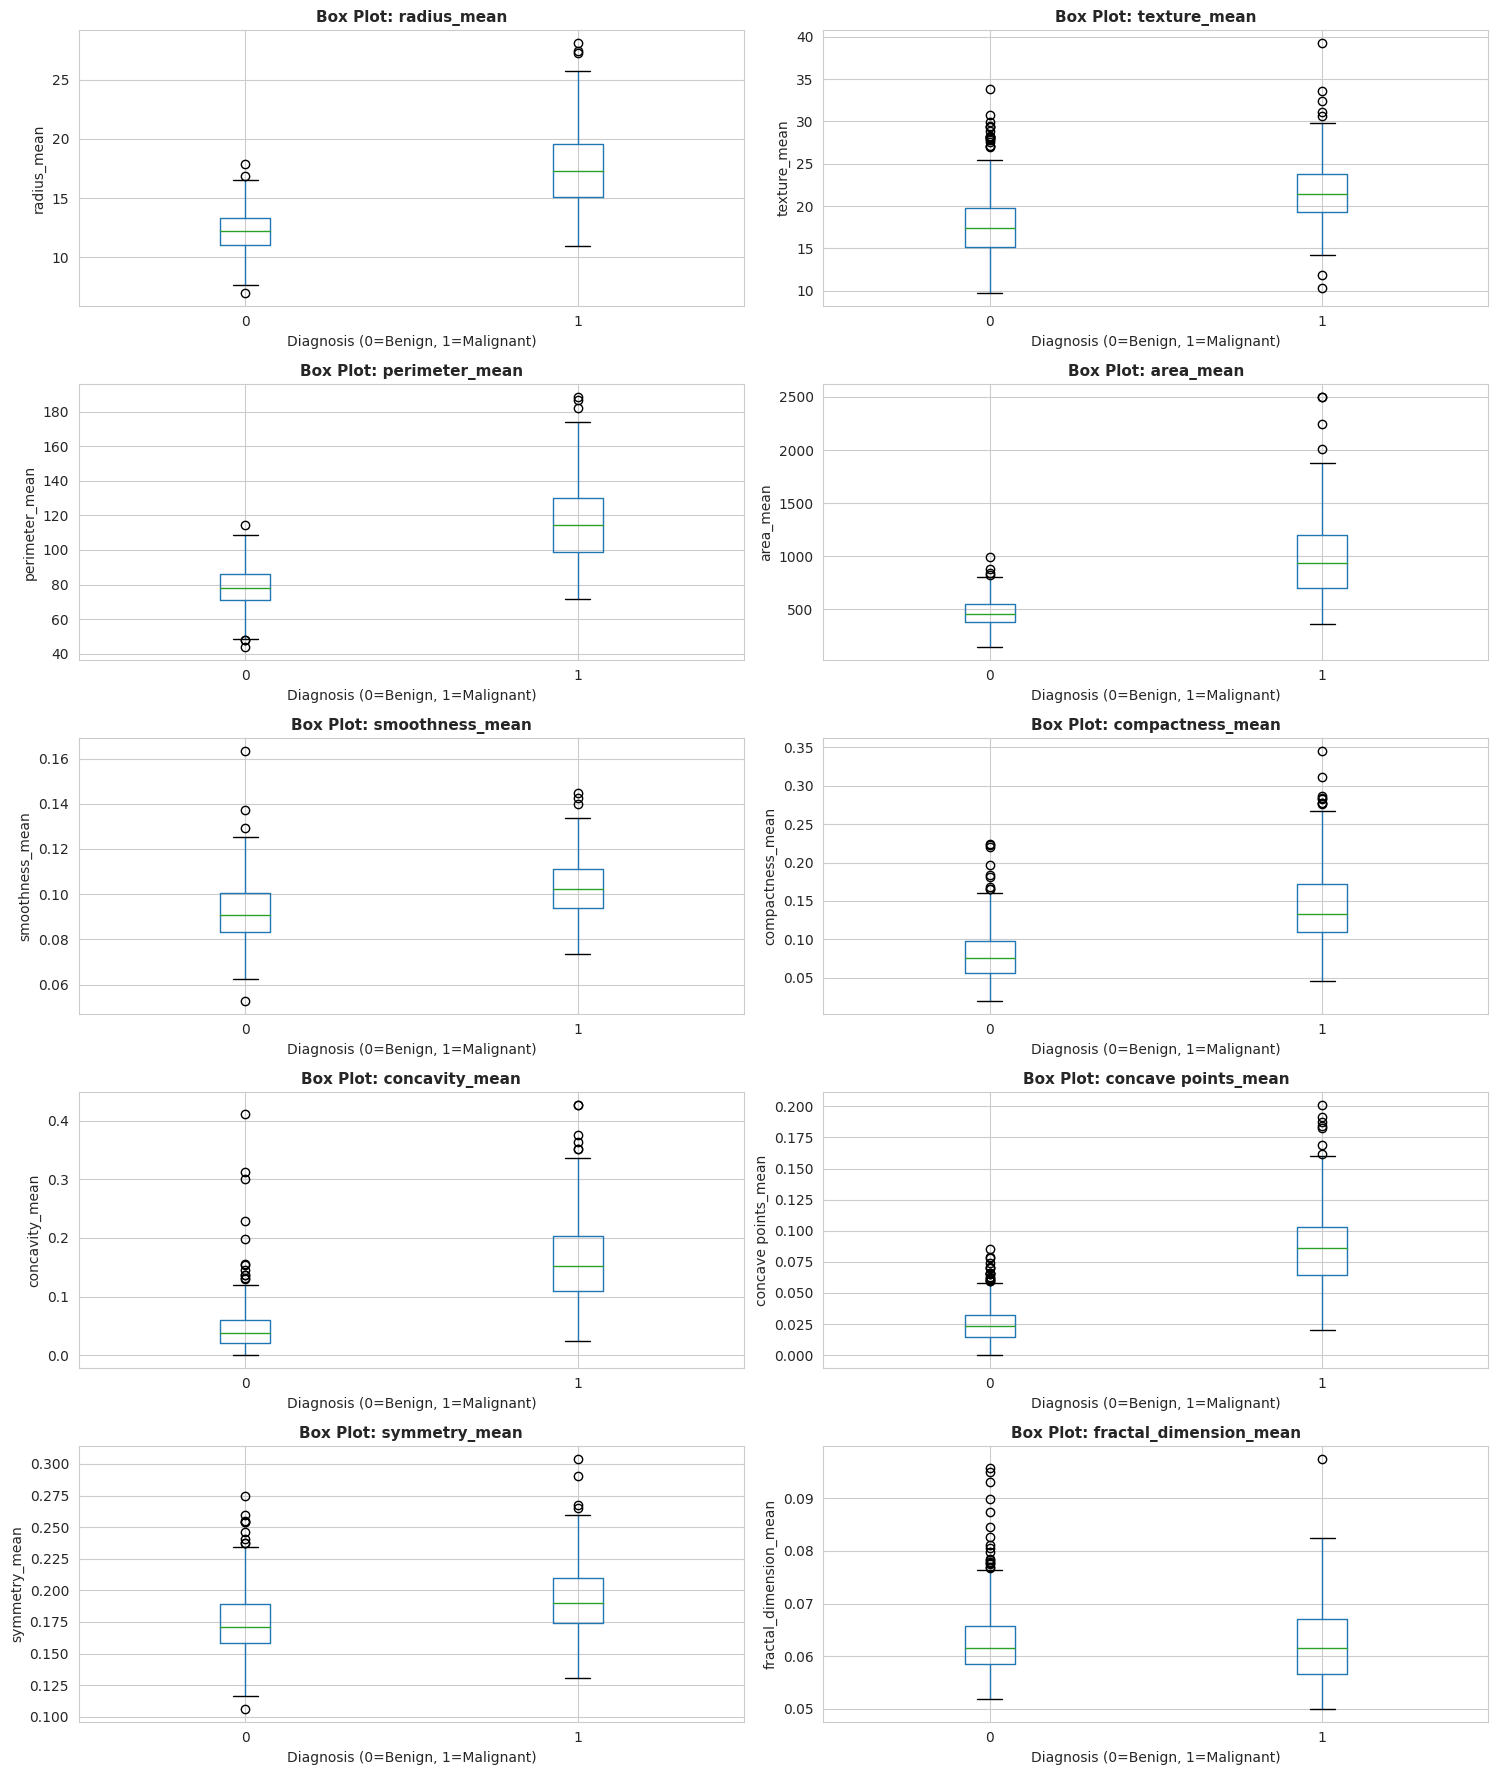

✓ Saved as 'mean_features_boxplot.png'

[3/7] Creating correlation matrix...


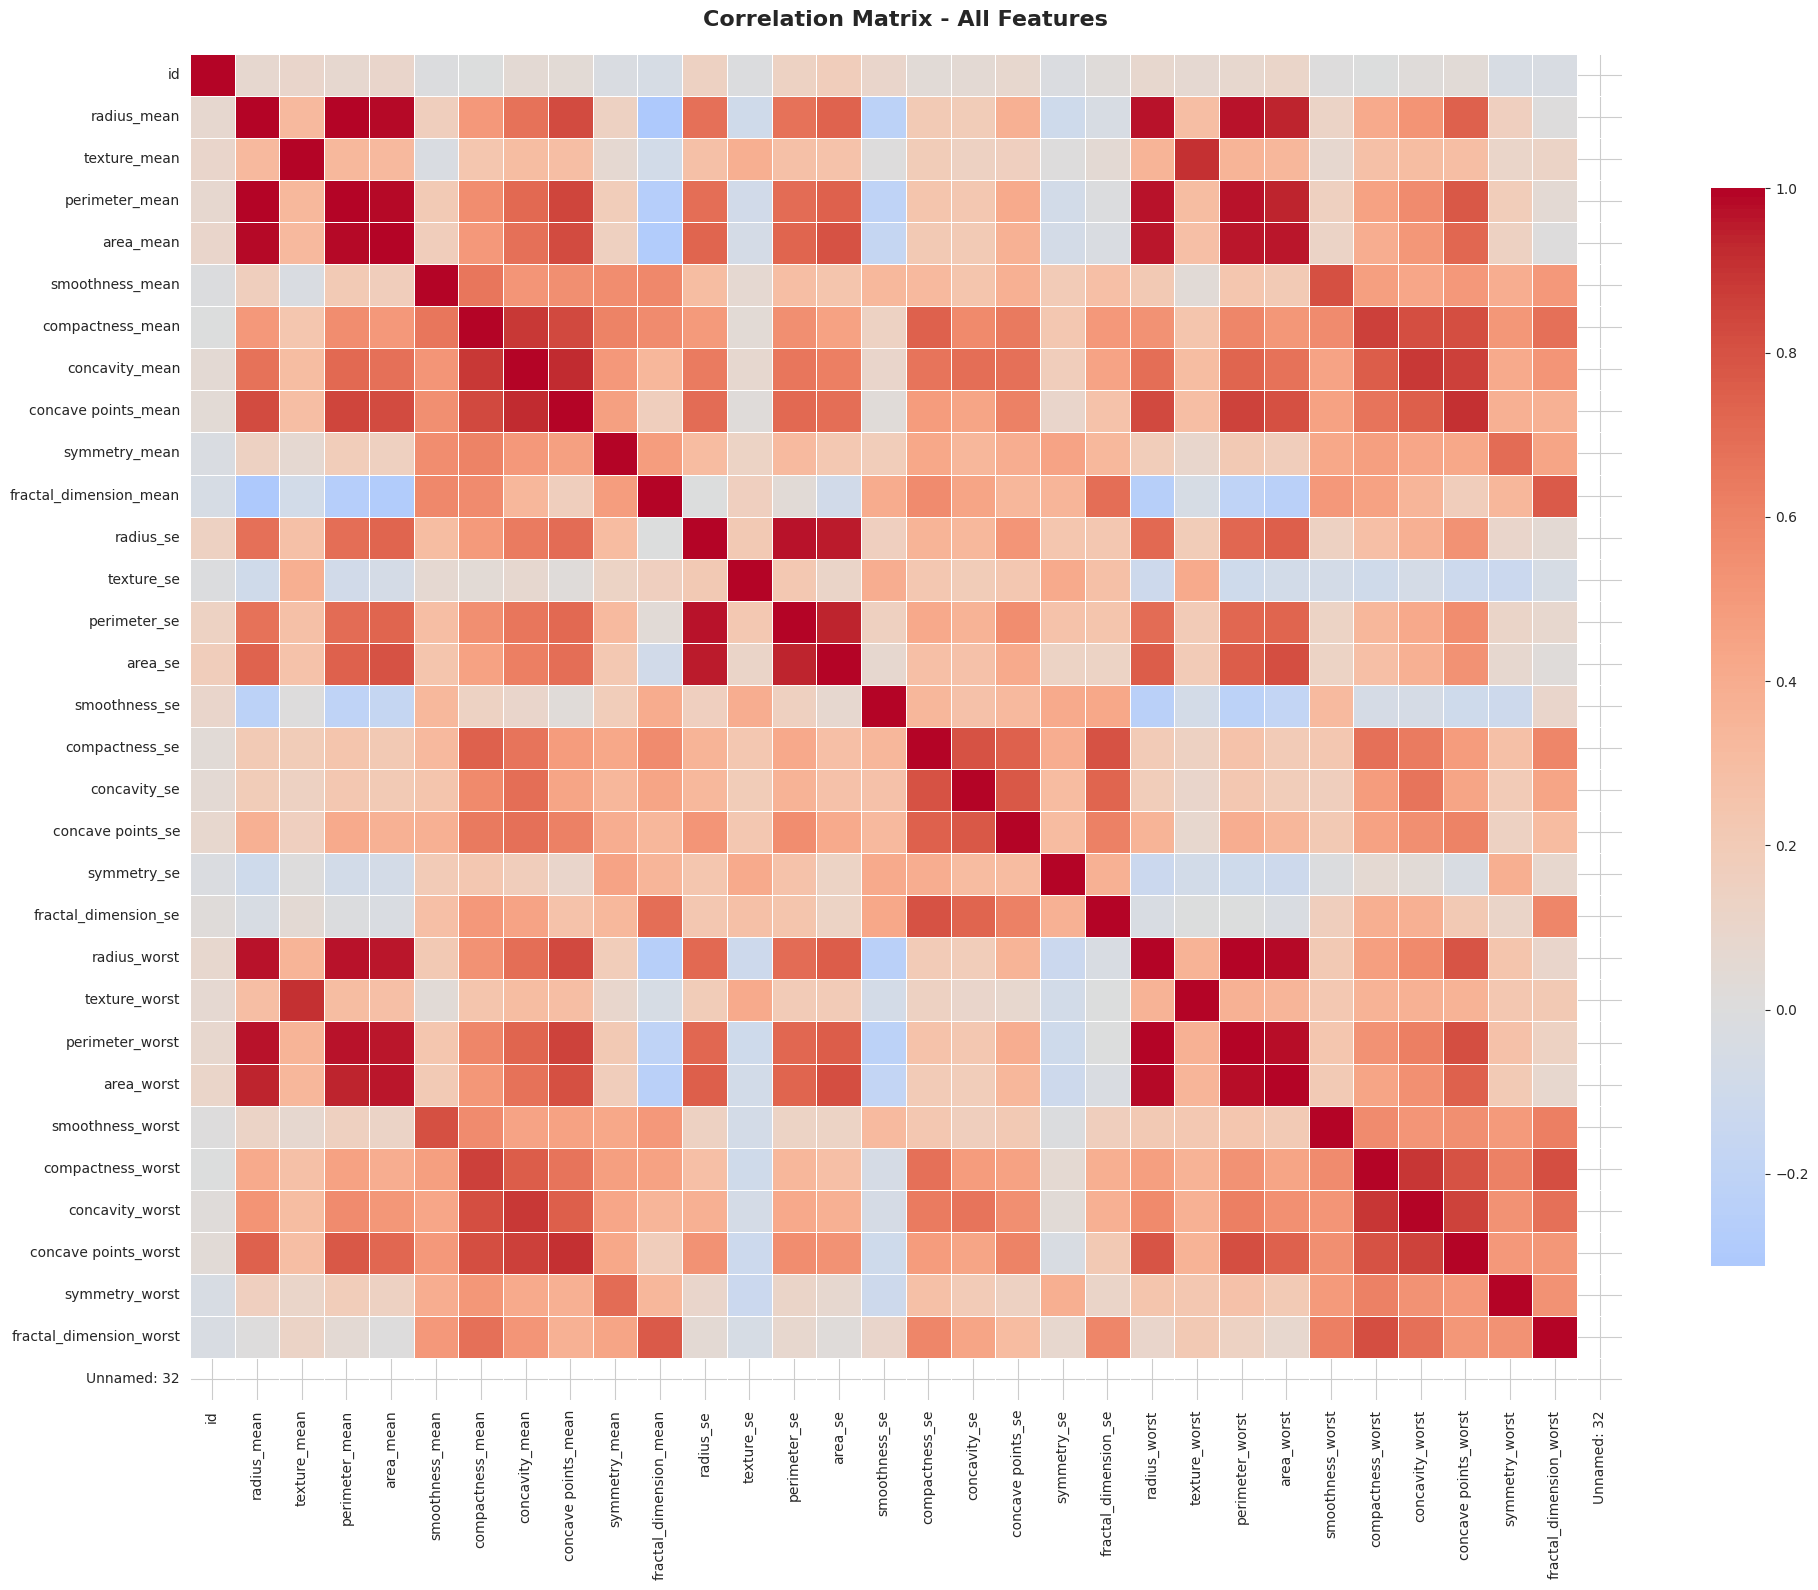

✓ Saved as 'correlation_matrix_full.png'

[4/7] Analyzing correlation with diagnosis...


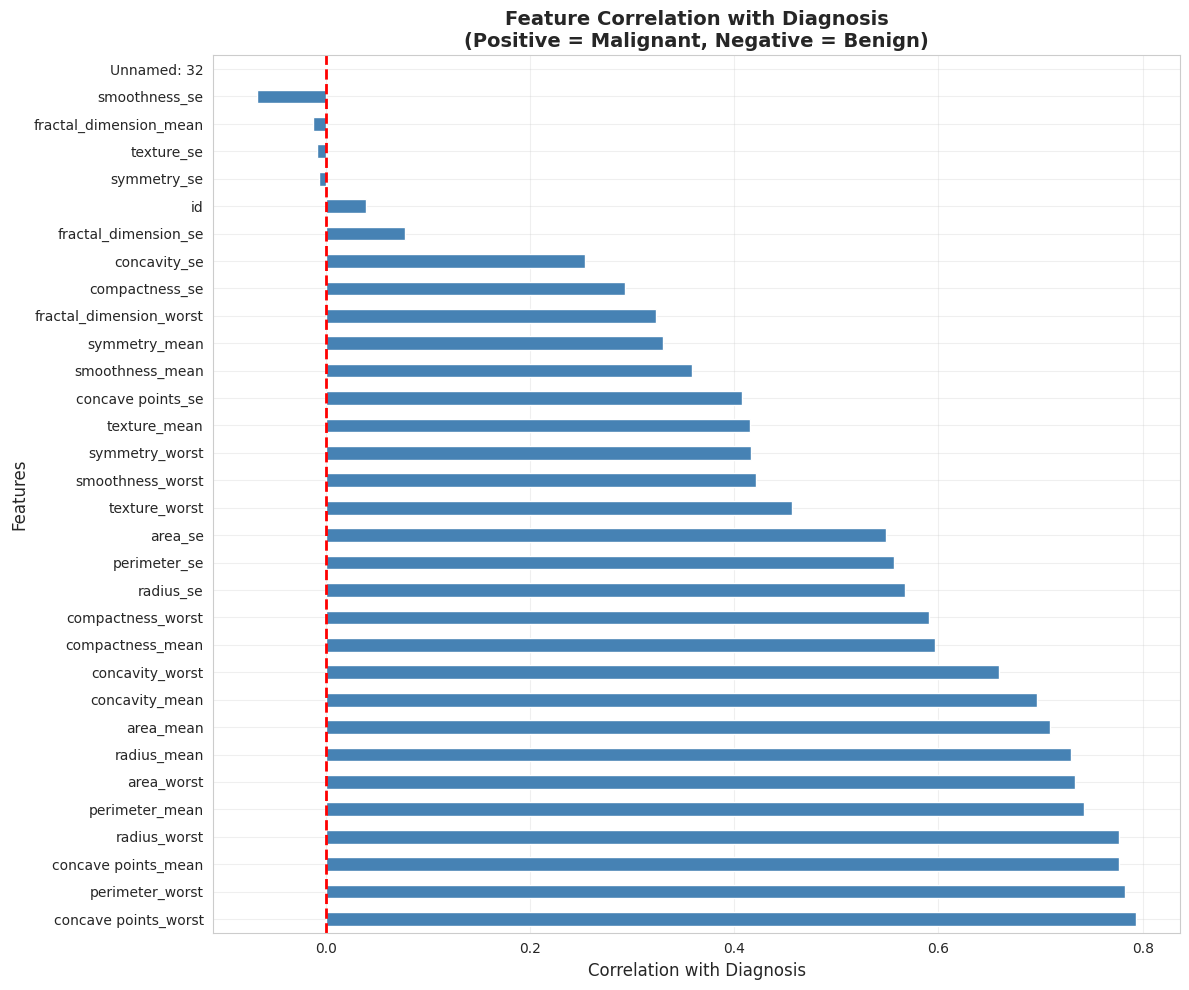

✓ Saved as 'correlation_with_diagnosis.png'

Top 10 features most correlated with Malignant diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64

[5/7] Creating scatter plots for feature categories...


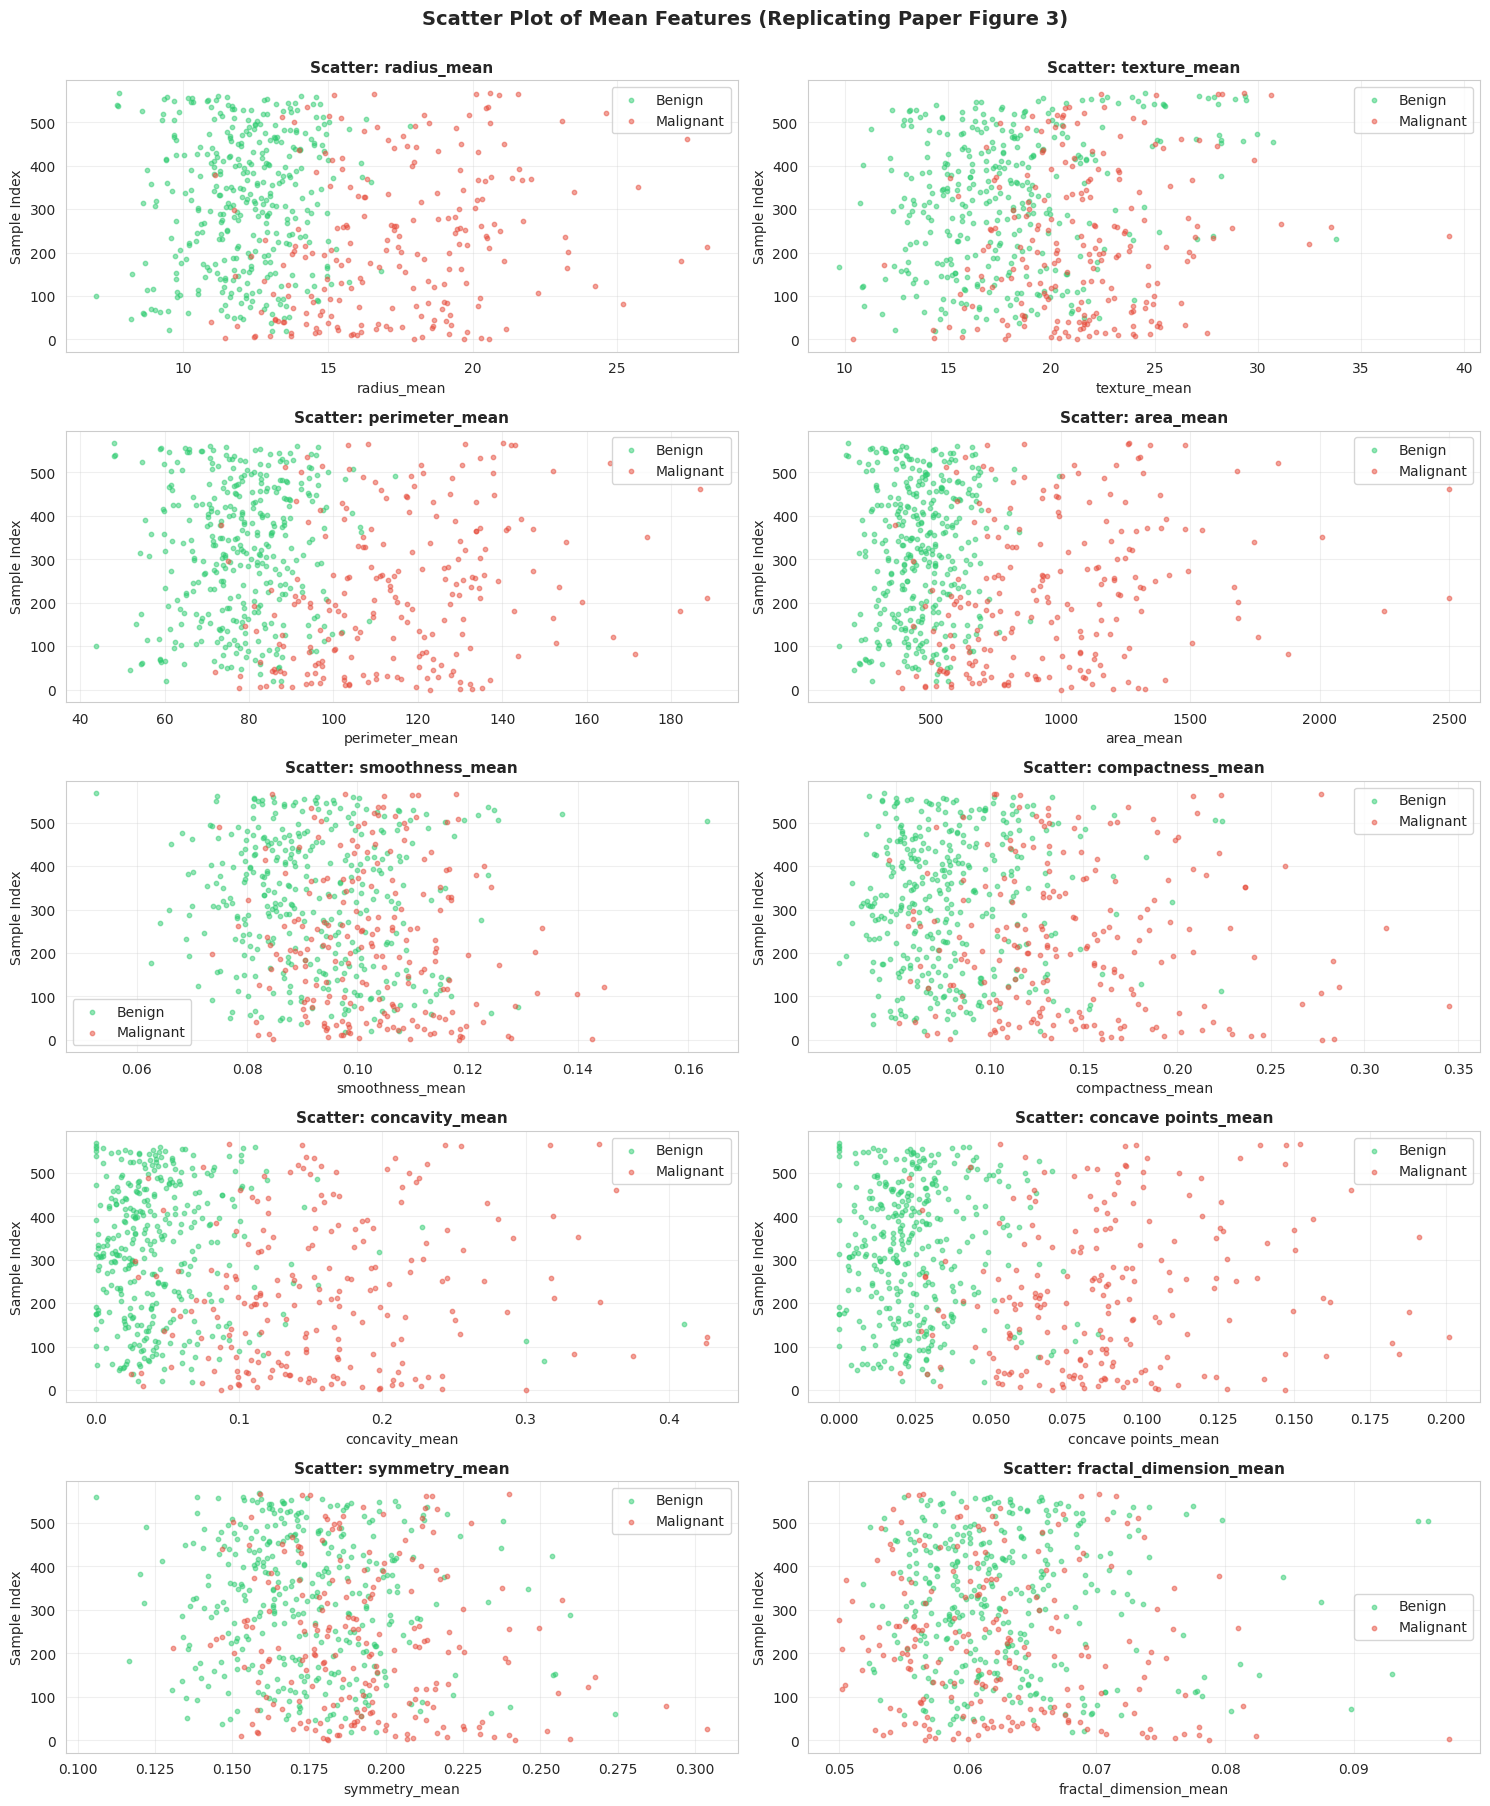

✓ Saved as 'scatter_mean_features.png'


In [69]:
# ============================================================================
#  EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# 1 Distribution of Mean Features
print("\n[1/7] Creating distribution plots for mean features...")
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    axes[idx].hist(benign[col], bins=30, alpha=0.6, label='Benign', color='#2ecc71', edgecolor='black')
    axes[idx].hist(malignant[col], bins=30, alpha=0.6, label='Malignant', color='#e74c3c', edgecolor='black')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mean_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'mean_features_distribution.png'")

# 2 Box plots for mean features
print("\n[2/7] Creating box plots for mean features...")
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    df.boxplot(column=col, by='diagnosis', ax=axes[idx])
    axes[idx].set_xlabel('Diagnosis (0=Benign, 1=Malignant)', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('mean_features_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'mean_features_boxplot.png'")

# 3 Correlation Matrix
print("\n[3/7] Creating correlation matrix...")
# Select only numeric columns (excluding diagnosis for now)
numeric_features = df.drop('diagnosis', axis=1)

plt.figure(figsize=(20, 16))
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'correlation_matrix_full.png'")

# 4 Correlation with diagnosis
print("\n[4/7] Analyzing correlation with diagnosis...")
correlations_with_diagnosis = df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(12, 10))
correlations_with_diagnosis.plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with Diagnosis', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlation with Diagnosis\n(Positive = Malignant, Negative = Benign)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_with_diagnosis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'correlation_with_diagnosis.png'")

print("\nTop 10 features most correlated with Malignant diagnosis:")
print(correlations_with_diagnosis.head(10))

# 9.5 Scatter plots (replicating Figure 3, 4, 5 from paper)
print("\n[5/7] Creating scatter plots for feature categories...")

# Mean features scatter plot
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    axes[idx].scatter(benign[col], benign.index, alpha=0.5, s=10, c='#2ecc71', label='Benign')
    axes[idx].scatter(malignant[col], malignant.index, alpha=0.5, s=10, c='#e74c3c', label='Malignant')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Sample Index', fontsize=10)
    axes[idx].set_title(f'Scatter: {col}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Scatter Plot of Mean Features (Replicating Paper Figure 3)', 
             fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.savefig('scatter_mean_features.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'scatter_mean_features.png'")



**3. Data Preparation**# 

In [70]:

# Remove 'id' column as it's not relevant for classification
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("\n✓ 'id' column removed")

# Remove 'Unnamed: 32' column if it exists (common in this dataset)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)
    print("✓ 'Unnamed: 32' column removed")

print(f"\nDataset shape after cleaning: {df.shape}")


✓ 'id' column removed
✓ 'Unnamed: 32' column removed

Dataset shape after cleaning: (569, 31)


In [71]:
# 10. DATA NORMALIZATION
# ============================================================================
print("\n" + "="*80)
print("DATA NORMALIZATION")
print("="*80)

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features using StandardScaler (as mentioned in the paper)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("\n✓ Features normalized using StandardScaler (mean=0, std=1)")
print("\nNormalized data statistics:")
print(X_normalized_df.describe())


DATA NORMALIZATION

Features shape: (569, 30)
Target shape: (569,)

✓ Features normalized using StandardScaler (mean=0, std=1)

Normalized data statistics:
        radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  7.492542e-17    4.745277e-16 -2.060449e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      1.148856e-15      1.998011e-16    3.746271e-17        -4.995028e-17

In [72]:
# 11. TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# Split data: 80% train, 20% test (paper used 70/30, but you specified 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.20, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(df))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(df))*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(f"  Benign: {(y_train == 0).sum()} samples")
print(f"  Malignant: {(y_train == 1).sum()} samples")

print(f"\nTesting set class distribution:")
print(f"  Benign: {(y_test == 0).sum()} samples")
print(f"  Malignant: {(y_test == 1).sum()} samples")


TRAIN-TEST SPLIT

Training set size: 455 samples (80.0%)
Testing set size: 114 samples (20.0%)

Training set class distribution:
  Benign: 285 samples
  Malignant: 170 samples

Testing set class distribution:
  Benign: 72 samples
  Malignant: 42 samples


In [73]:
# 12. SAVE PROCESSED DATA
# ============================================================================
print("\n" + "="*80)
print("SAVING PROCESSED DATA")
print("="*80)

# Save normalized data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print("\n✓ Data saved successfully:")
print("  - X_train.npy")
print("  - X_test.npy")
print("  - y_train.npy")
print("  - y_test.npy")

# Save feature names
feature_names = X.columns.tolist()
with open('feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")
print("  - feature_names.txt")

# Save scaler for future use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("  - scaler.pkl")



SAVING PROCESSED DATA

✓ Data saved successfully:
  - X_train.npy
  - X_test.npy
  - y_train.npy
  - y_test.npy
  - feature_names.txt
  - scaler.pkl


In [74]:
# 13. SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)

summary_report = f"""
WISCONSIN DIAGNOSTIC BREAST CANCER DATASET - EDA REPORT
{'='*80}

1. DATASET OVERVIEW
   - Total samples: {df.shape[0]}
   - Total features: {df.shape[1] - 1} (after removing ID)
   - Classes: Binary (Benign=0, Malignant=1)

2. CLASS DISTRIBUTION
   - Benign (B): {diagnosis_counts['B']} samples ({diagnosis_percentages['B']:.2f}%)
   - Malignant (M): {diagnosis_counts['M']} samples ({diagnosis_percentages['M']:.2f}%)
   - Balance: {'Relatively balanced' if abs(diagnosis_percentages['B'] - diagnosis_percentages['M']) < 20 else 'Imbalanced'}

3. FEATURE CATEGORIES
   - Mean features: {len(mean_features)}
   - Standard Error features: {len(se_features)}
   - Worst features: {len(worst_features)}
   - Total: {len(mean_features) + len(se_features) + len(worst_features)} features

4. DATA QUALITY
   - Missing values: {'None' if len(missing_df) == 0 else f'{len(missing_df)} columns'}
   - Duplicates: {df.duplicated().sum()}
   - Data types: All numeric (after encoding)

5. DATA PREPROCESSING
   - Normalization: StandardScaler (mean=0, std=1)
   - Train-Test Split: {(X_train.shape[0]/len(df))*100:.0f}% / {(X_test.shape[0]/len(df))*100:.0f}%
   - Random State: 42 (for reproducibility)

6. KEY FINDINGS
   - Most correlated features with Malignant diagnosis:
{chr(10).join([f'     • {feat}: {correlations_with_diagnosis[feat]:.3f}' for feat in correlations_with_diagnosis.head(5).index])}
   
   - Least correlated features with Malignant diagnosis:
{chr(10).join([f'     • {feat}: {correlations_with_diagnosis[feat]:.3f}' for feat in correlations_with_diagnosis.tail(5).index])}

7. LINEAR SEPARABILITY
   - The dataset appears to be linearly separable based on visualization
   - This aligns with the paper's findings that linear classifiers performed well
   - Mean features show clear separation between benign and malignant cases

8. FILES GENERATED
   - Training data: X_train.npy, y_train.npy
   - Testing data: X_test.npy, y_test.npy
   - Scaler: scaler.pkl
   - Feature names: feature_names.txt
   - Visualizations: 
     • class_distribution.png
     • mean_features_distribution.png
     • mean_features_boxplot.png
     • correlation_matrix_full.png
     • correlation_with_diagnosis.png
     • scatter_mean_features.png

9. NEXT STEPS (FOR OTHER TEAM MEMBERS)
   - Person 2-6: Load the processed data using:
     ```python
     X_train = np.load('X_train.npy')
     X_test = np.load('X_test.npy')
     y_train = np.load('y_train.npy')
     y_test = np.load('y_test.npy')
     ```
   - Implement ML algorithms: Linear Regression, MLP, Nearest Neighbor, 
     Softmax Regression, SVM, GRU-SVM
   - Target: >90% test accuracy (paper achieved ~99% with MLP)

{'='*80}
Report generated successfully!
"""

print(summary_report)

# Save report to file
with open('EDA_REPORT.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("\n✓ Complete EDA report saved as 'EDA_REPORT.txt'")

print("\n" + "="*80)
print("DATA PREPARATION & EDA COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nYou can now share the processed data files with your team members.")
print("All visualizations and the detailed report are ready for your project submission.")


SUMMARY REPORT

WISCONSIN DIAGNOSTIC BREAST CANCER DATASET - EDA REPORT

1. DATASET OVERVIEW
   - Total samples: 569
   - Total features: 30 (after removing ID)
   - Classes: Binary (Benign=0, Malignant=1)

2. CLASS DISTRIBUTION
   - Benign (B): 357 samples (62.74%)
   - Malignant (M): 212 samples (37.26%)
   - Balance: Imbalanced

3. FEATURE CATEGORIES
   - Mean features: 10
   - Standard Error features: 10
   - Worst features: 10
   - Total: 30 features

4. DATA QUALITY
   - Missing values: 1 columns
   - Duplicates: 0
   - Data types: All numeric (after encoding)

5. DATA PREPROCESSING
   - Normalization: StandardScaler (mean=0, std=1)
   - Train-Test Split: 80% / 20%
   - Random State: 42 (for reproducibility)

6. KEY FINDINGS
   - Most correlated features with Malignant diagnosis:
     • concave points_worst: 0.794
     • perimeter_worst: 0.783
     • concave points_mean: 0.777
     • radius_worst: 0.776
     • perimeter_mean: 0.743
   
   - Least correlated features with Maligna

# Modeling

In [75]:
from sklearn.preprocessing import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
],name='ANN_Model')


In [76]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [77]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6435 - loss: 0.6423 - val_accuracy: 0.8352 - val_loss: 0.4634
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9405 - loss: 0.3996 - val_accuracy: 0.9011 - val_loss: 0.3197
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.2679 - val_accuracy: 0.9121 - val_loss: 0.2344
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9709 - loss: 0.1780 - val_accuracy: 0.9341 - val_loss: 0.1895
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9589 - loss: 0.1572 - val_accuracy: 0.9231 - val_loss: 0.1658
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9869 - loss: 0.0993 - val_accuracy: 0.9231 - val_loss: 0.1521
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9773 - loss: 0.0796 - val_accuracy: 0.9231 - val_loss: 0.1453
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9861 - loss: 0.0828 - val_accuracy: 0.9341 - val_loss

# Evaluation

In [78]:
model.summary()


Model: "ANN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,613 (18.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,076 (12.02 KB)

In [79]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9850 - loss: 0.1083
Test Accuracy: 99.12%


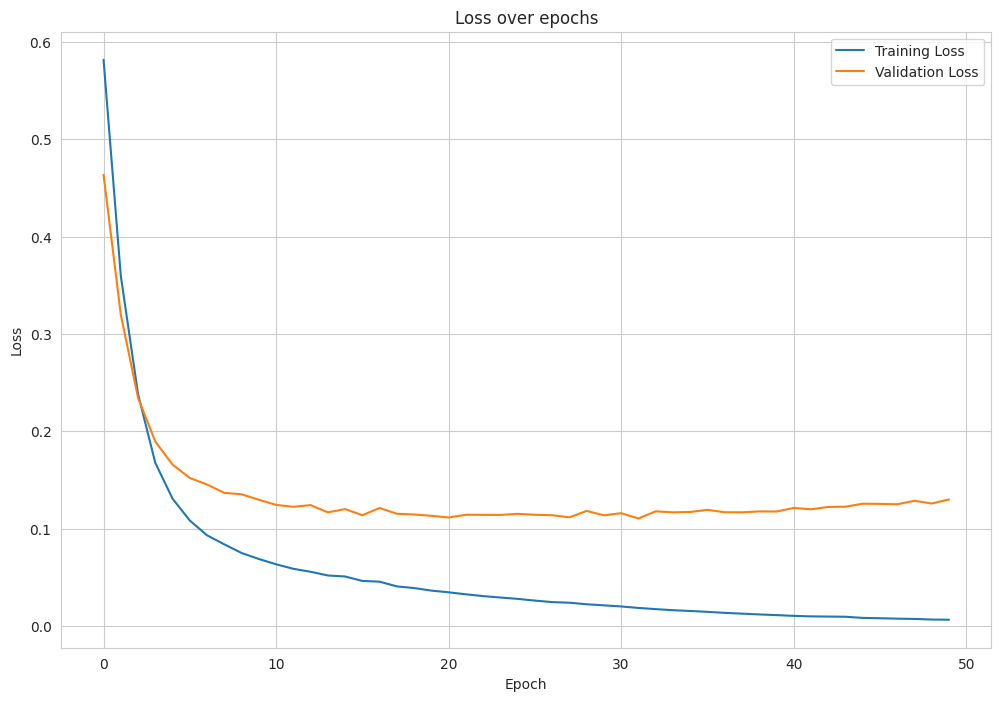

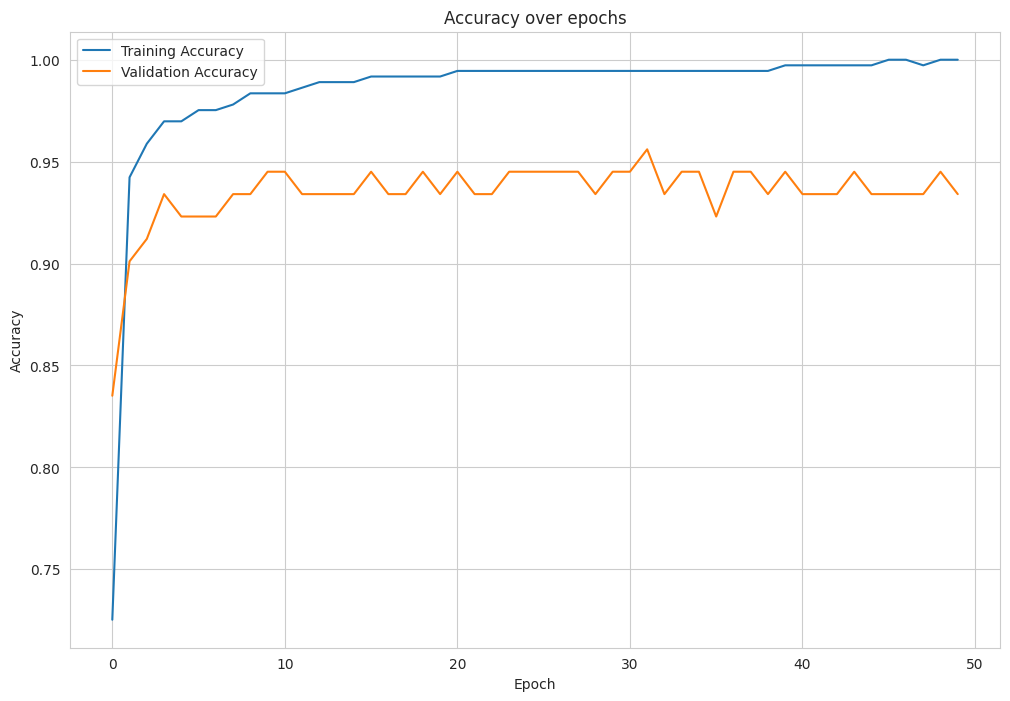

In [80]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7b0d76359800> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


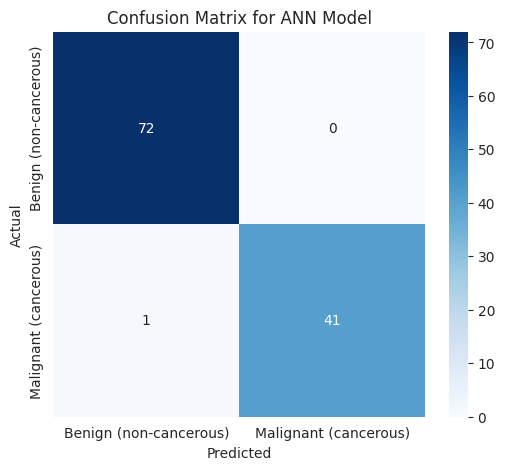

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(X_test) 
y_pred = (y_pred_prob > 0.5).astype(int) 

cm = confusion_matrix(y_test, y_pred)

class_names = ['Benign (non-cancerous)', 'Malignant (cancerous)']  
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for ANN Model')
plt.show()


RÉGRESSION LOGISTIQUE

In [82]:
# Cellule 1 - Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,6)

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix,
    classification_report, brier_score_loss, auc
)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

print("Libraries loaded")



Libraries loaded


In [84]:
# Cellule 2 - Chargement & target detection
# Remplace le chemin si nécessaire
path = "data.csv"
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
print("Dataset shape:", df.shape)

# Tentative d'identifier la colonne cible
target_candidates = ['target','diagnosis','label','class','y']
target = None
for c in target_candidates:
    if c in df.columns:
        target = c
        break

# Si non trouvé, cherche une colonne avec exactement 2 valeurs string (ex: M/B)
if target is None:
    for c in df.columns:
        if df[c].dtype == object and df[c].nunique() == 2:
            target = c
            break

if target is None:
    raise ValueError("Impossible de détecter la colonne cible automatiquement. Indique manuellement `target`.")

print("Detected target column:", target)

# Map M/B -> 1/0 if present
if df[target].dtype == object:
    df[target] = df[target].map(lambda x: 1 if str(x).upper().startswith('M') else 0)

# Drop ID-like columns if exist
for col in ['id','Id','ID']:
    if col in df.columns:
        df = df.drop(columns=[col])

# Remove unnamed stray columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print("After cleanup shape:", df.shape)
display(df.head())


Dataset shape: (569, 33)
Detected target column: diagnosis
After cleanup shape: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [86]:
# Cellule 3 - Features & split
X = df.drop(columns=[target])
y = df[target].astype(int)

# If there are non-numeric columns, get dummies
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    X = pd.get_dummies(X, drop_first=True)

# Fill missing numerical values
X = X.fillna(X.median())

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
feature_names = X_train.columns.tolist()


X_train shape: (455, 30) X_test shape: (114, 30)


In [87]:
# Cellule 4 - Standardisation
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=feature_names, index=X_test.index)

print("Standardization done.")


Standardization done.


In [88]:
# Cellule 5 - Logistic Regression baseline
lr_base = LogisticRegression(penalty='none', solver='lbfgs', max_iter=5000)
lr_base.fit(X_train_scaled, y_train)

y_pred_base = lr_base.predict(X_test_scaled)
y_proba_base = lr_base.predict_proba(X_test_scaled)[:,1]

metrics_base = {
    "accuracy": accuracy_score(y_test, y_pred_base),
    "precision": precision_score(y_test, y_pred_base),
    "recall": recall_score(y_test, y_pred_base),
    "f1": f1_score(y_test, y_pred_base),
    "auc": roc_auc_score(y_test, y_proba_base)
}
print("Baseline metrics:", metrics_base)


Baseline metrics: {'accuracy': 0.9385964912280702, 'precision': 0.9487179487179487, 'recall': 0.8809523809523809, 'f1': 0.9135802469135802, 'auc': 0.9684193121693123}


In [89]:
# Cellule 6 - VIF computation (use train scaled to be numerically stable)
Xvif = X_train_scaled.copy()
vif_df = pd.DataFrame({
    "feature": Xvif.columns,
    "VIF": [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]
}).sort_values("VIF", ascending=False).reset_index(drop=True)

display(vif_df.head(20))
print("Count VIF > 10 :", (vif_df['VIF'] > 10).sum())
print("Count VIF < 5  :", (vif_df['VIF'] < 5).sum())


,feature,VIF
0,perimeter_mean,4110.573130
1,radius_mean,4041.752147
2,radius_worst,799.619693
3,perimeter_worst,419.638192
4,area_mean,348.192488
5,area_worst,326.077517
6,radius_se,80.885287
7,perimeter_se,78.795991
8,concavity_mean,74.853098
9,concave points_mean,70.731045


Count VIF > 10 : 24
Count VIF < 5  : 3


In [90]:
# Cellule 7 - Quick compare L1 / L2 / ElasticNet
models = {
    "L1": LogisticRegression(penalty='l1', solver='saga', max_iter=5000),
    "L2": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000),
    "ElasticNet": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=5000)
}

reg_results = []
for name, m in models.items():
    m.fit(X_train_scaled, y_train)
    p = m.predict(X_test_scaled)
    prob = m.predict_proba(X_test_scaled)[:,1]
    reg_results.append({
        "model": name,
        "accuracy": accuracy_score(y_test, p),
        "precision": precision_score(y_test, p),
        "recall": recall_score(y_test, p),
        "f1": f1_score(y_test, p),
        "auc": roc_auc_score(y_test, prob),
        "non_zero_coefs": np.sum(m.coef_[0] != 0)
    })

pd.DataFrame(reg_results)


,model,accuracy,precision,recall,f1,auc,non_zero_coefs
0,L1,0.973684,0.97561,0.952381,0.963855,0.997024,15
1,L2,0.964912,0.97500,0.928571,0.951220,0.996032,30
2,ElasticNet,0.964912,0.97500,0.928571,0.951220,0.996693,26


In [91]:
# Cellule 8 - GridSearchCV (valid param combinations)
param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs','saga']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1], 'solver': ['saga'], 'l1_ratio': [0.2,0.5,0.8]}
]

grid = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42),
                    param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
y_proba_best = best_model.predict_proba(X_test_scaled)[:,1]


Best params: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best CV AUC: 0.996078431372549


Test metrics (best model): {'accuracy': 0.9649122807017544, 'precision': 0.975, 'recall': 0.9285714285714286, 'f1': 0.951219512195122, 'auc': 0.9831349206349206}

Classification report:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



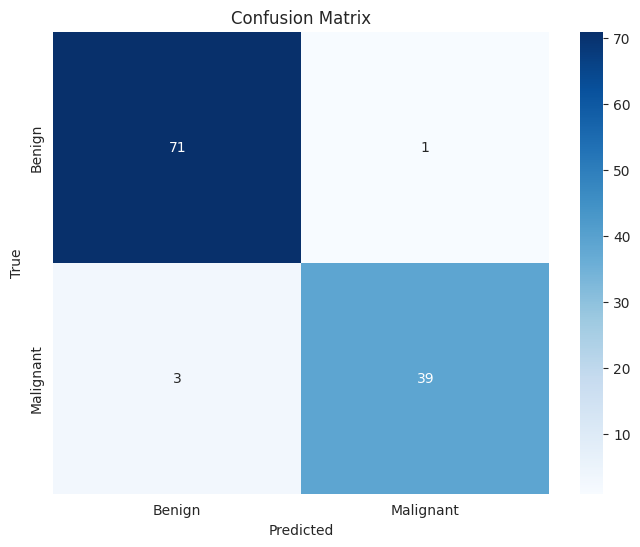

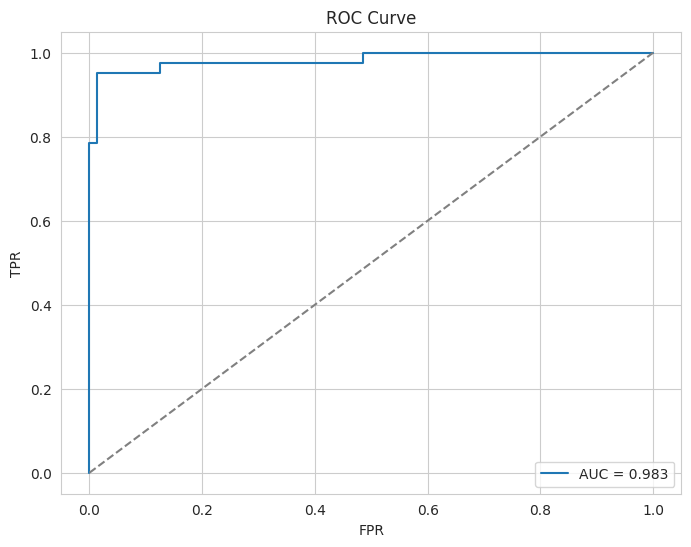

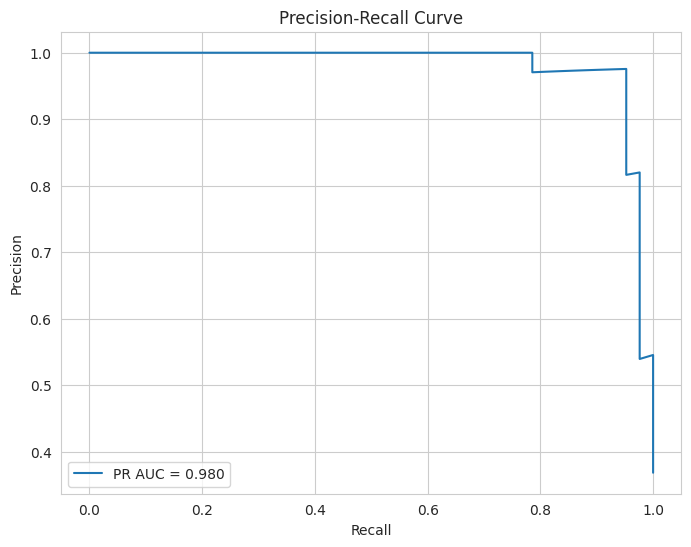

In [92]:
# Cellule 9 - Evaluation & plots
metrics_best = {
    "accuracy": accuracy_score(y_test, y_pred_best),
    "precision": precision_score(y_test, y_pred_best),
    "recall": recall_score(y_test, y_pred_best),
    "f1": f1_score(y_test, y_pred_best),
    "auc": roc_auc_score(y_test, y_proba_best)
}
print("Test metrics (best model):", metrics_best)
print("\nClassification report:\n", classification_report(y_test, y_pred_best, target_names=['Benign','Malignant']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test,y_proba_best):.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend(); plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_best)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall Curve"); plt.legend(); plt.show()


In [93]:
# Cellule 10 - Coefficients interpretation
coefs = best_model.coef_.flatten()
coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coefs})
coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values("abs_coef", ascending=False).reset_index(drop=True)

display(coef_df.head(20))  # top 20 features

# Short guidance
print("- Coef > 0 -> augmente probabilité de classe 1 (ici: Malignant)")
print("- Coef < 0 -> diminue probabilité de classe 1 (favorise Benign)")
print("- Si beaucoup de VIF élevés, coefficients peuvent être instables.")


,feature,coefficient,abs_coef
0,radius_se,4.787090,4.787090
1,texture_worst,4.230699,4.230699
2,concave points_mean,3.663648,3.663648
3,area_se,3.360643,3.360643
4,compactness_mean,-3.180223,3.180223
5,symmetry_worst,3.161886,3.161886
6,concavity_worst,3.094720,3.094720
7,concave points_se,3.067001,3.067001
8,compactness_se,-2.437972,2.437972
9,area_worst,2.296349,2.296349


- Coef > 0 -> augmente probabilité de classe 1 (ici: Malignant)
- Coef < 0 -> diminue probabilité de classe 1 (favorise Benign)
- Si beaucoup de VIF élevés, coefficients peuvent être instables.


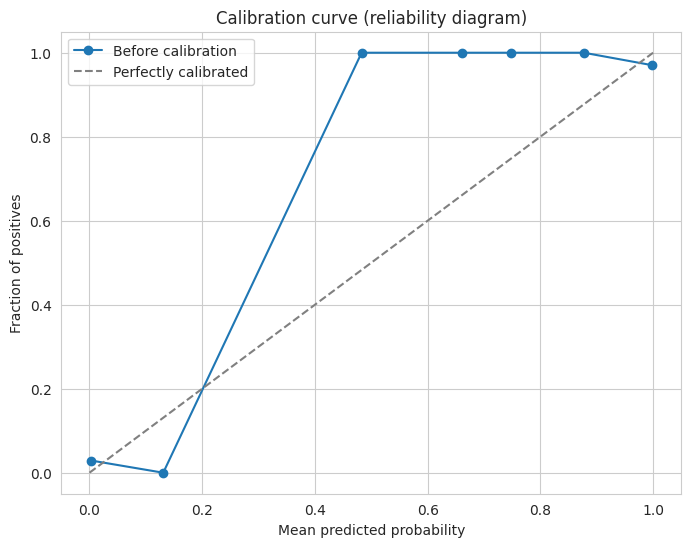

Brier score (before): 0.030722569693550177
Brier score (sigmoid): 0.04392181714592555
Brier score (isotonic): 0.030667571745042255


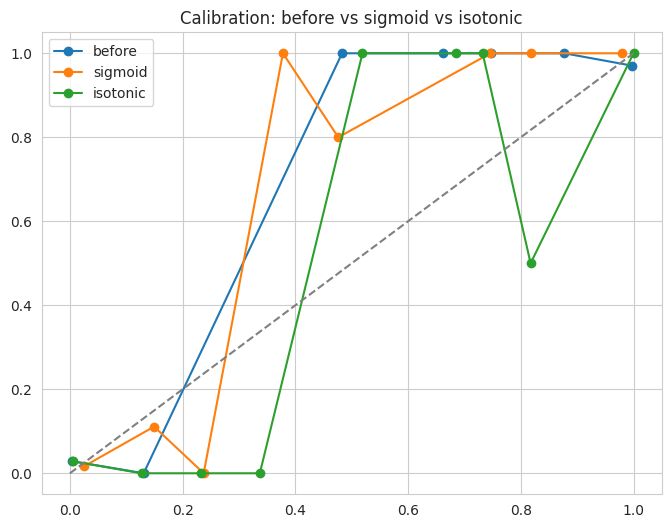

In [94]:
# Cellule 11 - Calibration tests
prob_true, prob_pred = calibration_curve(y_test, y_proba_best, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Before calibration')
plt.plot([0,1],[0,1],'--', color='gray', label='Perfectly calibrated')
plt.xlabel("Mean predicted probability"); plt.ylabel("Fraction of positives")
plt.title("Calibration curve (reliability diagram)")
plt.legend(); plt.show()

brier_before = brier_score_loss(y_test, y_proba_best)
print("Brier score (before):", brier_before)

# Optional: calibrate with sigmoid and isotonic and compare Brier
cal_sig = CalibratedClassifierCV(best_model, method='sigmoid', cv=5)
cal_iso = CalibratedClassifierCV(best_model, method='isotonic', cv=5)

cal_sig.fit(X_train_scaled, y_train)
cal_iso.fit(X_train_scaled, y_train)

p_sig = cal_sig.predict_proba(X_test_scaled)[:,1]
p_iso = cal_iso.predict_proba(X_test_scaled)[:,1]

print("Brier score (sigmoid):", brier_score_loss(y_test, p_sig))
print("Brier score (isotonic):", brier_score_loss(y_test, p_iso))

# Plot calibrated curves
pt_s, pp_s = calibration_curve(y_test, p_sig, n_bins=10)
pt_i, pp_i = calibration_curve(y_test, p_iso, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='before')
plt.plot(pp_s, pt_s, marker='o', label='sigmoid')
plt.plot(pp_i, pt_i, marker='o', label='isotonic')
plt.plot([0,1],[0,1],'--', color='gray')
plt.legend(); plt.title("Calibration: before vs sigmoid vs isotonic"); plt.show()


In [96]:
# Cellule 12 - Save artifacts
import joblib, os
os.makedirs("artifacts", exist_ok=True)
joblib.dump(best_model, "artifacts/best_logistic.pkl")
joblib.dump(scaler, "artifacts/scaler.pkl")
print("Saved best model and scaler in ./artifacts/")


Saved best model and scaler in ./artifacts/
